In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Loading  titanic dataset
df = pd.read_csv('/content/titanic.csv')

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [35]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [36]:
df.shape

(1309, 21)

In [37]:
df['Body'].value_counts()

,count
Body,
175MB,1
322M,1
38MB,1
234MB,1
181MB,1
...,...
28MB[82],1
35MB,1
53MB,1


In [38]:
df = df[df['Survived'].notnull()]
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']


In [39]:
y.isnull().sum()

np.int64(0)

In [40]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
df['Age'].fillna(df['Age'].mean(),  inplace = True )

/tmp/ipython-input-1186976952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),  inplace = True )


In [42]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Body'].fillna(0, inplace=True)      # since 'Body' may be 0 = not found
df['WikiId'].fillna(df['WikiId'].mode()[0], inplace=True)
df['Age_wiki'].fillna(df['Age_wiki'].mean(), inplace=True)


/tmp/ipython-input-4228948879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(), inplace=True)
/tmp/ipython-input-4228948879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [43]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Hometown'].fillna(df['Hometown'].mode()[0], inplace=True)
df['Boarded'].fillna(df['Boarded'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['Class'].fillna(df['Class'].mode()[0], inplace=True)
df['Name_wiki'].fillna('Unknown', inplace=True)  # or use mode


/tmp/ipython-input-3056429588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-3056429588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [44]:
df.drop(['Cabin', 'Lifeboat'], axis=1, inplace=True)


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",0,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,0,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,0,3.0


In [46]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [47]:
lb = LabelEncoder()
df['Sex_encoded'] = lb.fit_transform(df['Sex'])

In [48]:
x = df[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']]

In [49]:
x


,Pclass,Sex_encoded,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [50]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [51]:
# decison tree model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
clf = DecisionTreeClassifier(random_state=42)

In [53]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = clf.predict(x_test)

In [55]:
y_test

,Survived
709,1.0
439,0.0
840,0.0
720,1.0
39,1.0
...,...
433,0.0
773,0.0
25,1.0
84,1.0


In [56]:
y_pred

array([0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1.])

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ", accuracy)

accuracy :  0.770949720670391


[Text(0.39517879144265233, 0.9791666666666666, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.20194892473118278, 0.9375, 'x[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.29856385808691754, 0.9583333333333333, 'True  '),
 Text(0.034050179211469536, 0.8958333333333334, 'x[2] <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.014336917562724014, 0.8541666666666666, 'x[4] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.007168458781362007, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.021505376344086023, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.053763440860215055, 0.8541666666666666, 'x[2] <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]'),
 Text(0.035842293906810034, 0.8125, 'x[2] <= 24.5\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.021505376344086023, 0.7708333333333334, 'x[5] <= 13.396\ngini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.014336917562724014, 0.

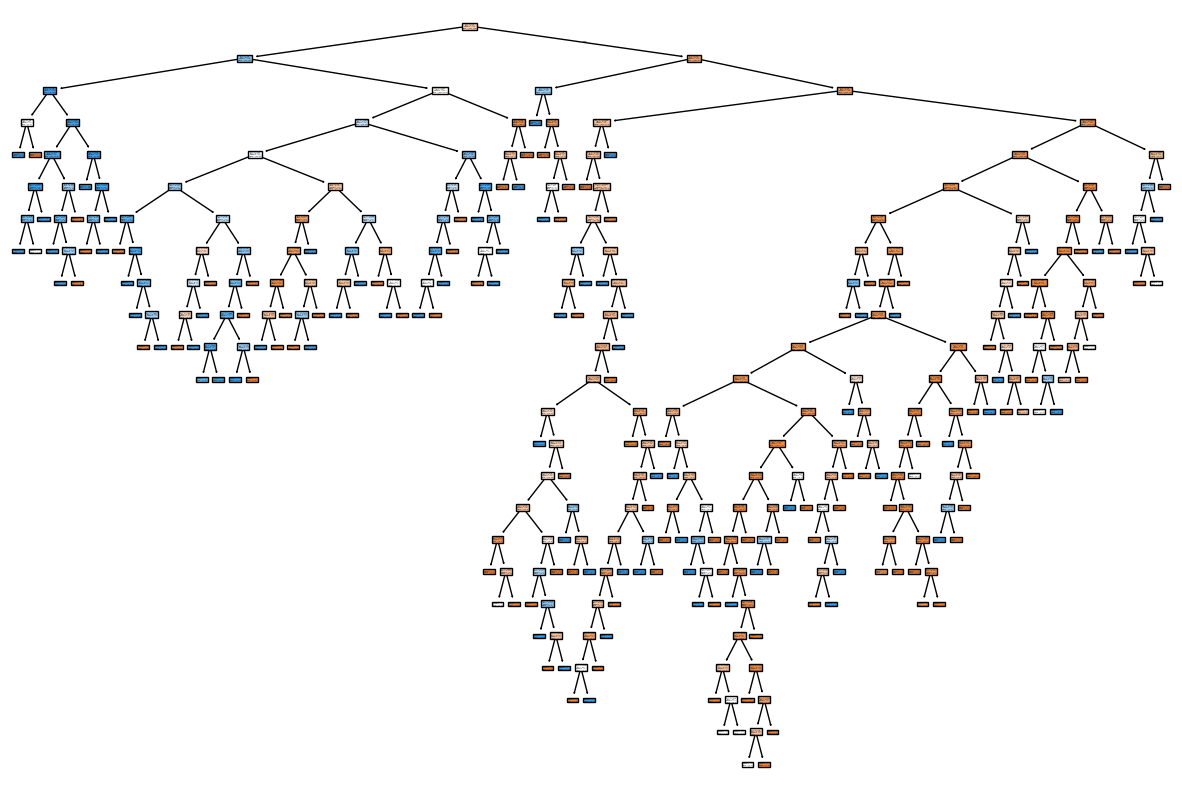

In [58]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)

In [59]:
#puning the tree
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, impurities = path.ccp_alphas,path.impurities


In [60]:
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 3.90137328e-05, 6.68806849e-05,
       1.12437093e-04, 1.56054931e-04, 1.58050519e-04, 2.34082397e-04,
       2.34082397e-04, 4.05742821e-04, 4.68164794e-04, 4.68164794e-04,
       4.68164794e-04, 5.35045479e-04, 6.24219725e-04, 6.66839770e-04,
       6.67991230e-04, 7.43388946e-04, 8.19288390e-04, 8.19288390e-04,
       8.58302122e-04, 8.64304235e-04, 8.94231048e-04, 9.24769963e-04,
       9.36329588e-04, 9.36329588e-04, 9.86469280e-04, 1.05337079e-03,
       1.05337079e-03, 1.07400895e-03, 1.09238452e-03, 1.12359551e-03,
       1.12359551e-03, 1.12359551e-03, 1.22893258e-03, 1.27565833e-03,
       1.29645635e-03, 1.30996111e-03, 1.33761370e-03, 1.33779007e-03,
       1.34831461e-03, 1.43382412e-03, 1.50115999e-03, 1.55100936e-03,
       1.58849332e-03, 1.67201712e-03, 1.87265918e-03, 1.89237138e-03,
       2.00538236e-03, 2.02916600e-03, 2.10674157e-03, 2.10674157e-03,
       2.58607030e-03, 2.64273538e-03, 2.69412911e-03, 3.09573970e-03,
      

In [ ]:
#print(type(ccp_alphas))

In [ ]:
#print(type(clfs))


In [64]:
cross_val_score(DecisionTreeClassifier(), x, y,scoring ='accuracy', cv=5).mean()


np.float64(0.7733601154980855)

In [85]:
#max_depth
cross_val_score(DecisionTreeClassifier(max_depth=6), x, y,scoring ='accuracy', cv=5).mean()

np.float64(0.8159500345238844)

In [ ]:
#  like my previous accuracy was accuracy  around 0.77 something
# by using max_depth and the min_samples_leaf  the accuracy was  accuracy around 0.81 increased

In [89]:
#min_sample_leaf
cross_val_score(DecisionTreeClassifier(min_samples_leaf=8),x,y,scoring='accuracy',cv=5).mean()

np.float64(0.8171175695185487)

In [90]:
params1 = {'min_samples_leaf': [None , 2,3,4,5,6,7,8]}
grid1 = GridSearchCV(DecisionTreeClassifier(),params1)
grid1.fit(x,y)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_pa

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [None, 2, 3, 4, 5, 6, 7, 8]})

In [91]:
grid1.best_params_

{'min_samples_leaf': 7}

In [93]:
grid1.best_score_

np.float64(0.8182411650241667)

In [73]:
#installization of gridsearch cv {max_depth}
params ={'max_depth': [None , 2,3,4,6,7]}

In [74]:
grid = GridSearchCV(DecisionTreeClassifier(),params)

In [75]:
grid.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 2, 3, 4, 6, 7]})

In [77]:
grid.best_params_

{'max_depth': 6}

In [78]:
grid.best_score_

np.float64(0.817079907099366)

In [ ]:
#  like my previous accuracy was accuracy  around 0.77 something
# by using max_depth and the min_samples_leaf  the accuracy was  accuracy around 0.81 increased

In [98]:
params3 = {'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}
grid2 = GridSearchCV(DecisionTreeClassifier(), params3)
grid2.fit(x, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [99]:
grid2.best_params_

{'min_samples_split': 8}

In [100]:
grid2.best_score_

np.float64(0.791312535308518)

In [ ]:
# by tunning parameters like : max_depth, Min_sample_spit , min_sample_leaf
# increased my accuracy and makes model to avoid over or underfitting

In [ ]:
# and before pruning my model growth is maxminum like it used to take noisy data  but after puning the growth limlited
#becoz we used hyperparameters